<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries

from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
from google.colab import drive  
#import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/new_datasets'

Mounted at /content/gdrive


In [43]:
airline = pd.read_csv("./gdrive/My Drive/datasets/new_datasets/airline.csv")

In [4]:
airline.sample(5)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text
1617,99,1335526567678779392,2020-12-06 10:08:41,"['upon', 'time', 'airfrance', 'vintage', 'avia...",41,False,"Toulon, France",en,Air France,upon time airfrance vintage aviation aviationl...
263,27,1336774357276831748,2020-12-09 20:46:57,"['anyone', 'make', 'pretty', 'woman', 'experie...",1,False,London,en,Virgin Atlantic,anyone make pretty woman experience heathrow take
1629,122,1335164020651855872,2020-12-05 10:08:03,"['flying', 'hannover', 'airport', 'germany', '...",2,False,NaN,en,Air France,flying hannover airport germany lufthansa airf...
362,226,1334906257971556353,2020-12-04 17:03:47,"['yesterday', 'said', 'goodbye', 'ruby', 'tues...",57,False,NaN,en,Virgin Atlantic,yesterday said goodbye ruby tuesday last boein...
759,305,1335841845532741632,2020-12-07 07:01:29,"['qatarairways', 'recent', 'issue', 'alarming'...",0,False,"Cairo, Egypt",en,Qatar airways,qatarairways recent issue alarming passenger rece


#Lexicon-based Approach

This approach utilizes lexicon or dictionaries. In this step semantic orientation or polarity of words or phrases in the document are used in calculating the orientation for a document.

#TextBlob
When calculating sentiment for a single word, TextBlob uses a sophisticated technique known to mathematicians as “averaging”.

#Create a function to get the subjectivity

Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties.

In [5]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity

Sentiment analysis is a method of identifying attitudes in text data about a subject of interest. It is scored using polarity values that range from 1 to -1. Values closer to 1 indicate more positivity, while values closer to -1 indicate more negativity.

In [6]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [44]:
# Create two new columns 'Subjectivity' & 'Polarity'
airline['subjectivity'] = airline['text'].apply(getSubjectivity)
airline['polarity'] = airline['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
airline.head(5)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity
0,0,1336979288470548481,2020-12-10 10:21:16,"['achieve', 'kingdom', 'vision', 'sustainabili...",0,False,"RIYADH,SAUDI ARABIA",en,Saudia airlines,achieve kingdom vision sustainability economic...,0.133333,0.116667
1,2,1336950027005161473,2020-12-10 08:25:00,"['achieve', 'kingdom', 'vision', 'sustainabili...",5,False,"Jeddah, Saudi Arabia",en,Saudia airlines,achieve kingdom vision sustainability economic...,0.133333,0.116667
2,540,1336909751532351489,2020-12-10 05:44:58,"['dmampget', 'mark', 'java', 'database', 'acco...",0,False,NaN,en,Saudia airlines,dmampget mark java database accounting finance...,0.000000,0.000000
3,541,1336827127824572422,2020-12-10 00:16:38,"['illdo', 'math', 'stat', 'marketing', 'accoun...",0,False,NaN,en,Saudia airlines,illdo math stat marketing accounting onlineexa...,0.000000,0.000000
4,542,1336826958764789762,2020-12-10 00:15:58,"['illdo', 'math', 'stat', 'marketing', 'accoun...",2,False,United States,en,Saudia airlines,illdo math stat marketing accounting onlineexa...,0.000000,0.000000


In [8]:
def getPolarityPlot(polarity, airline):
   fig, ax = plt.subplots(figsize=(8, 6))

   # Plot histogram of the polarity values
   polarity.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
                 ax=ax,
                 color="purple")

   plt.title("Sentiments from Tweets on " +airline)
   plt.show()

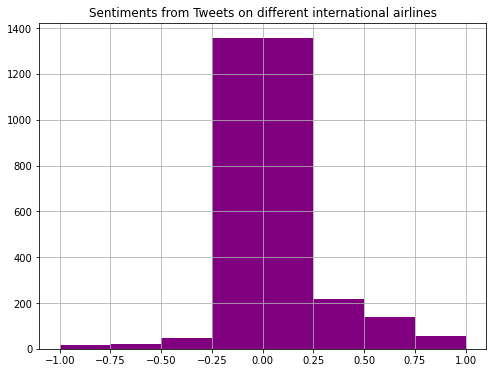

In [9]:
getPolarityPlot(airline['polarity'], "different international airlines")

It is clear that the majority of tweets have positive santiment(>0).

#Classify the tweets based on polarity value 

In [10]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [45]:
airline['sentiment'] = airline['polarity'].apply(getSentiment)

In [12]:
airline.sample(5)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity,sentiment
1021,118,1336307197903589385,2020-12-08 13:50:38,"['furry', 'family', 'member', 'relocated', 'ac...",0,False,South Africa,en,British airways,furry family member relocated across globe glo...,0.000000,0.0,Neutral
1559,357,1333826138951602178,2020-12-01 17:31:47,"['petit', 'avion', 'jour', 'plane', 'boeing', ...",0,False,Worldwide,en,American airlines,petit avion jour plane boeing americanairlines...,0.000000,0.0,Neutral
426,392,1333795492594024449,2020-12-01 15:30:00,"['confirms', 'amazing', 'time', 'attitudeaward...",19,False,"London, UK",en,Virgin Atlantic,confirms amazing time attitudeawards last year...,0.483333,0.3,Positive
741,279,1335979384428179457,2020-12-07 16:08:01,"['qatarairways', 'anyone', 'travelled', 'qatar...",0,False,NaN,en,Qatar airways,qatarairways anyone travelled qatar airway che...,0.250000,0.0,Neutral
1585,31,1336657106557153280,2020-12-09 13:01:02,"['waiting', 'refund', 'month', 'since', 'june'...",0,False,NaN,en,Air France,waiting refund month since june hour counting,0.000000,0.0,Neutral


# visualizing the seniment

In [13]:
color_list = ['#8dd3c7',
              '#bebada',
              '#fb8072',
              '#80b1d3',
              '#fdb462',
              '#b3de69',
              '#fccde5',
              '#d9d9d9']

In [14]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True,colors = color_list, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

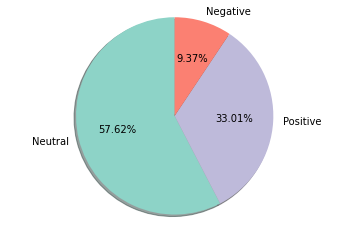

In [38]:
createPieChartFor(airline.sentiment)

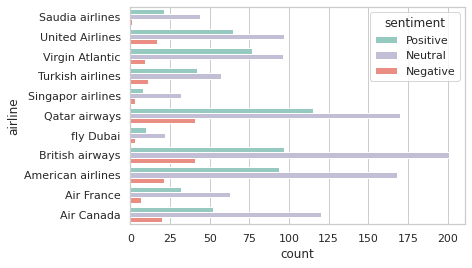

In [52]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",hue = "sentiment", data=airline,  palette= color_list)

# Printing positive tweets 

In [16]:
print('Printing positive tweets:\n')
j=1
sortedDF = airline.sort_values(by=['polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['text'][i])
    print()
    j= j+1


Printing positive tweets:

1) ['achieve', 'kingdom', 'vision', 'sustainability', 'economic', 'power', 'social', 'development', 'knowledge', 'transfer']

2) ['achieve', 'kingdom', 'vision', 'sustainability', 'economic', 'power', 'social', 'development', 'knowledge', 'transfer', 'aviation', 'industry', 'saei', 'saudiairlines', 'company', 'signed', 'memorandum', 'understanding', 'agreement', 'technics']

3) ['happy', 'anniversary', 'best', 'airline', 'ever', 'always', 'saudia']

4) ['realflow', 'allinone', 'software', 'start', 'grow', 'real', 'estate', 'investing', 'business', 'video', 'link']

5) ['airline', 'great', 'taste', 'travel', 'soft', 'feeling', 'friendly', 'crew', 'always', 'enjoyed', 'frequent']

6) ['saudi', 'arabia', 'saudi', 'prince', 'strongly', 'criticizes', 'israel', 'bahrain', 'summit', 'although', 'prince', 'hold', 'offi']

7) ['saudia', 'covid', 'rule', 'eygpt', 'different', 'airline', 'others', 'rightly', 'allow', 'passenger']

8) ['realflow', 'allinone', 'software',

# Printing negative tweets 

In [17]:
 
print('Printing negative tweets:\n')
j=1
sortedDF = airline.sort_values(by=['polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['text'][i])
    print()
    j=j+1

Printing negative tweets:

1) ['iran', 'foreign', 'minister', 'zarif', 'desperate', 'blame', 'kingdom', 'saudiarabia', 'anything', 'negative', 'happens']

2) ['unitedairlines', 'green']

3) ['toilet', 'plume', 'dirty', 'secret', 'airline', 'dont', 'address', 'happy', 'talk', 'cleaning', 'mask', 'middle', 'seat']

4) ['unitedairlines', 'green', 'carbon', 'capture']

5) ['correction', 'support', 'active', 'duty', 'member', 'veteran', 'dont', 'recognize', 'reserve', 'national']

6) ['worst', 'airline', 'everattendants', 'unprofessionalnever', 'worstairlinesunited']

7) ['article', 'little', 'anything', 'united', 'airline', 'continues', 'worse']

8) ['sitting', 'united', 'airline', 'flight', 'safety', 'however', 'front', 'plane', 'empty']

9) ['hate', 'unitedairlines']

10) ['fashion', 'unitedairlines', 'common', 'retweet']

11) ['sitting', 'united', 'airline', 'flight', 'safety', 'however', 'front', 'plane', 'empty']

12) ['plane', 'back', 'crib', 'flight', 'attendant', 'exhausted', 'expl

#try

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
text_ex = 'changi ready vaccine distribution asia singapore cargo gear safe transportation'
blob = TextBlob(text_ex)
blob.tags 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('changi', 'NNS'),
 ('ready', 'JJ'),
 ('vaccine', 'JJ'),
 ('distribution', 'NN'),
 ('asia', 'NN'),
 ('singapore', 'NN'),
 ('cargo', 'NN'),
 ('gear', 'VBP'),
 ('safe', 'JJ'),
 ('transportation', 'NN')]

In [ ]:
blob.sentences

[Sentence("consumer flight booking cancelled airline covid efund processed goibibo complaint filed")]

In [ ]:
blob.words

WordList(['consumer', 'flight', 'booking', 'cancelled', 'airline', 'covid', 'efund', 'processed', 'goibibo', 'complaint', 'filed'])

In [ ]:
blob.ngrams(1)

[WordList(['consumer']),
 WordList(['flight']),
 WordList(['booking']),
 WordList(['cancelled']),
 WordList(['airline']),
 WordList(['covid']),
 WordList(['efund']),
 WordList(['processed']),
 WordList(['goibibo']),
 WordList(['complaint']),
 WordList(['filed'])]

In [ ]:
airline['try'] = airline.text.apply(lambda x: np.mean(
              [TextBlob(r[0]).sentiment.polarity for r in TextBlob(x).ngrams(1)]))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [ ]:
airline.sample(5)

In [ ]:
from textblob import TextBlob
import pandas as pd
import statistics as s

df = pd.DataFrame({'text':['this is great!','how dare you?!']})
df['score'] = 0

for j in range(10):
    lst=[]
    i = text.text[j]
    d = TextBlob(i)
    words_list=d.words
    for i in words_list:
        f = TextBlob(i)
        print(f.sentiment)
        lst.append(f.sentiment.polarity)
    z = s.mean(lst)
    df['score'][j] = z

NameError: ignored

In [ ]:
for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

0.35


In [ ]:
text_list = ['consumer', 'flight', 'booking', 'cancelled', 'airline', 'covid', 'refund', 'processed', 'goibibo', 'complaint', 'filed']
for word in blob.words:
  print(word.sentiment.polarity)


AttributeError: ignored

In [ ]:
blob.words.sentiment.polarity

AttributeError: ignored

#Get the positive reason

In [18]:
#test
text_list = ['changi', 'ready', 'vaccine', 'distribution', 'asia', 'singapore', 'cargo', 'gear', 'safe', 'transportation']
for i in text_list:
    # Not sure what is in common_words, but it needs to be a string
    polarity = TextBlob(i).sentiment.polarity
    if polarity != 0:
      print(i,polarity)


ready 0.2
safe 0.5


#Get the words for positive and negative sentiment

In [48]:
#transform from "str" to list
airline["text"] = airline["text"].apply(eval)

In [ ]:
#make sure that text column is list
#for i, l in enumerate(airline["test1"]):
#    print("list",i,"is",type(l))

In [49]:
airline['reason']= ''
for index, airline_list in enumerate(airline['text']):
  reasons_list = []
  for word in airline_list:
    polarity = TextBlob(word).sentiment.polarity
    if polarity != 0:
      reasons_list.append(word)
    airline['reason'][index]= reasons_list

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
airline.sample(10)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity,sentiment,reason
385,275,1334574177987272704,2020-12-03 19:04:13,"[morning, final, virgin, atlantic, boeing, gvx...",0,False,Doncaster,en,Virgin Atlantic,morning final virgin atlantic boeing gvxlg lef...,0.500000,0.000000,Neutral,[]
260,22,1336843646071693313,2020-12-10 01:22:17,"[literally, minute, sister, landed, sent, wond...",61,False,"Pinal Airpark, Marana, AZ",en,Virgin Atlantic,literally minute sister landed sent wonderful ...,1.000000,1.000000,Positive,[wonderful]
252,11,1337081847956824064,2020-12-10 17:08:48,"[virgin, sell, reality, dramatic, opening, sug...",0,False,NaN,en,Virgin Atlantic,virgin sell reality dramatic opening suggests ...,0.600000,-0.433333,Negative,[dramatic]
1296,25,1336973186471170049,2020-12-10 09:57:02,"[american, airline, offer, athome, covid, test...",1,False,"New York City, USA",en,American airlines,american airline offer athome covid test travel,0.000000,0.000000,Neutral,[]
1616,98,1335529991367512067,2020-12-06 10:22:17,"[good, morning, airfrance]",0,False,Germany,en,Air France,good morning airfrance,0.600000,0.700000,Positive,[good]
1180,429,1335108962107052032,2020-12-05 06:29:16,"[british, airway, plan, boeing, diego, next, y...",1,False,Carlsbad Village,en,British airways,british airway plan boeing diego next year als...,0.000000,0.000000,Neutral,[]
603,30,1337052596071227395,2020-12-10 15:12:34,"[seattle, added, qatar, airway, network, first...",1,False,United Kingdom,en,Qatar airways,seattle added qatar airway network first quart...,0.394444,0.233333,Positive,"[first, becoming]"
167,139,1335313059112370180,2020-12-05 20:00:16,"[adopts, benefit, preservation, plan, protect,...",0,False,"Las Vegas, NV",en,United Airlines,adopts benefit preservation plan protect valua...,0.000000,0.000000,Neutral,[]
717,235,1336325523966857225,2020-12-08 15:03:27,"[time, rediscover, south, africa, qatarairways...",0,False,London,en,Qatar airways,time rediscover south africa qatarairways resu...,0.000000,0.000000,Neutral,[]
193,167,1334677608009752577,2020-12-04 01:55:13,"[caffreyusa, lvmpd, employee, huntersurnamein,...",0,False,I HAVE BEEN+AM THE ONLY VICTIM,en,United Airlines,caffreyusa lvmpd employee huntersurnamein rela...,0.000000,0.000000,Neutral,[]


#Save the data set

In [53]:
airline.to_csv('airline_classified.csv')
!cp airline_classified.csv "./gdrive/My Drive/datasets/new_datasets/"